In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

In [2]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [3]:
import streamlit as st

In [12]:
# Read the dataset
df = pd.read_csv("Thyroid_Diff_2.csv")
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [24]:
df["Focality"].unique()

array(['Uni-Focal', 'Multi-Focal'], dtype=object)

In [5]:
# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [6]:
# Split the data into features and labels
X = df.drop('Recurred', axis=1)
y = df['Recurred']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

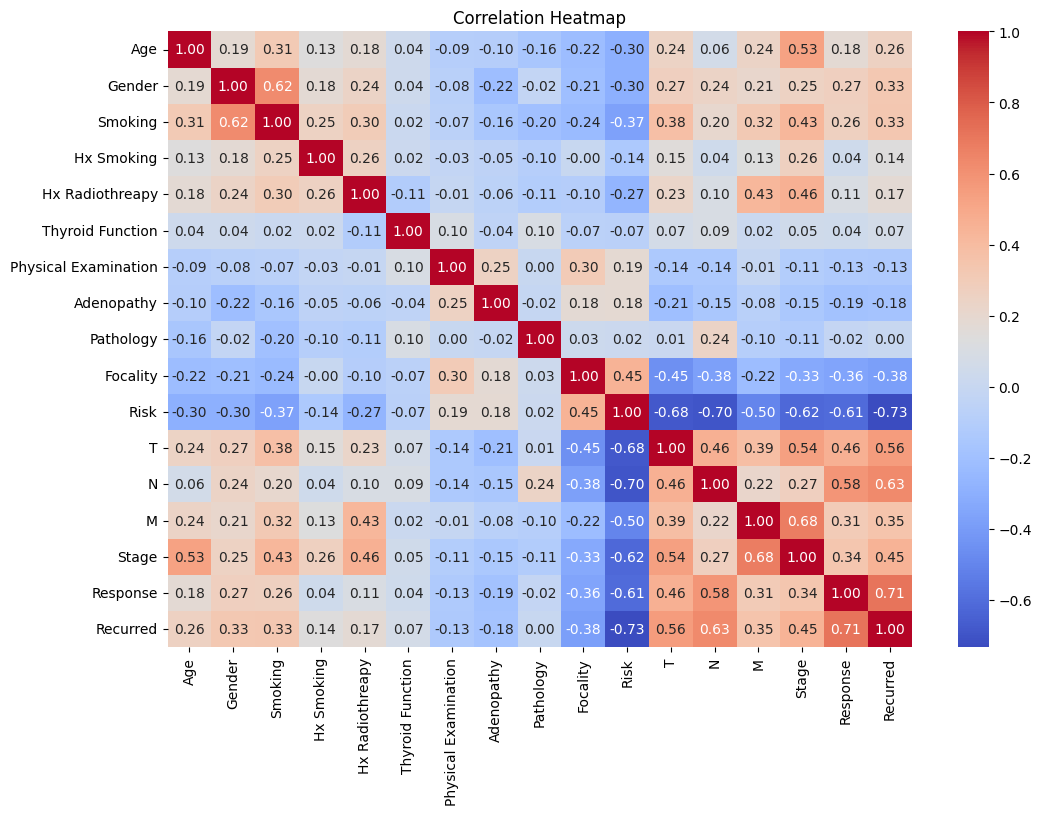

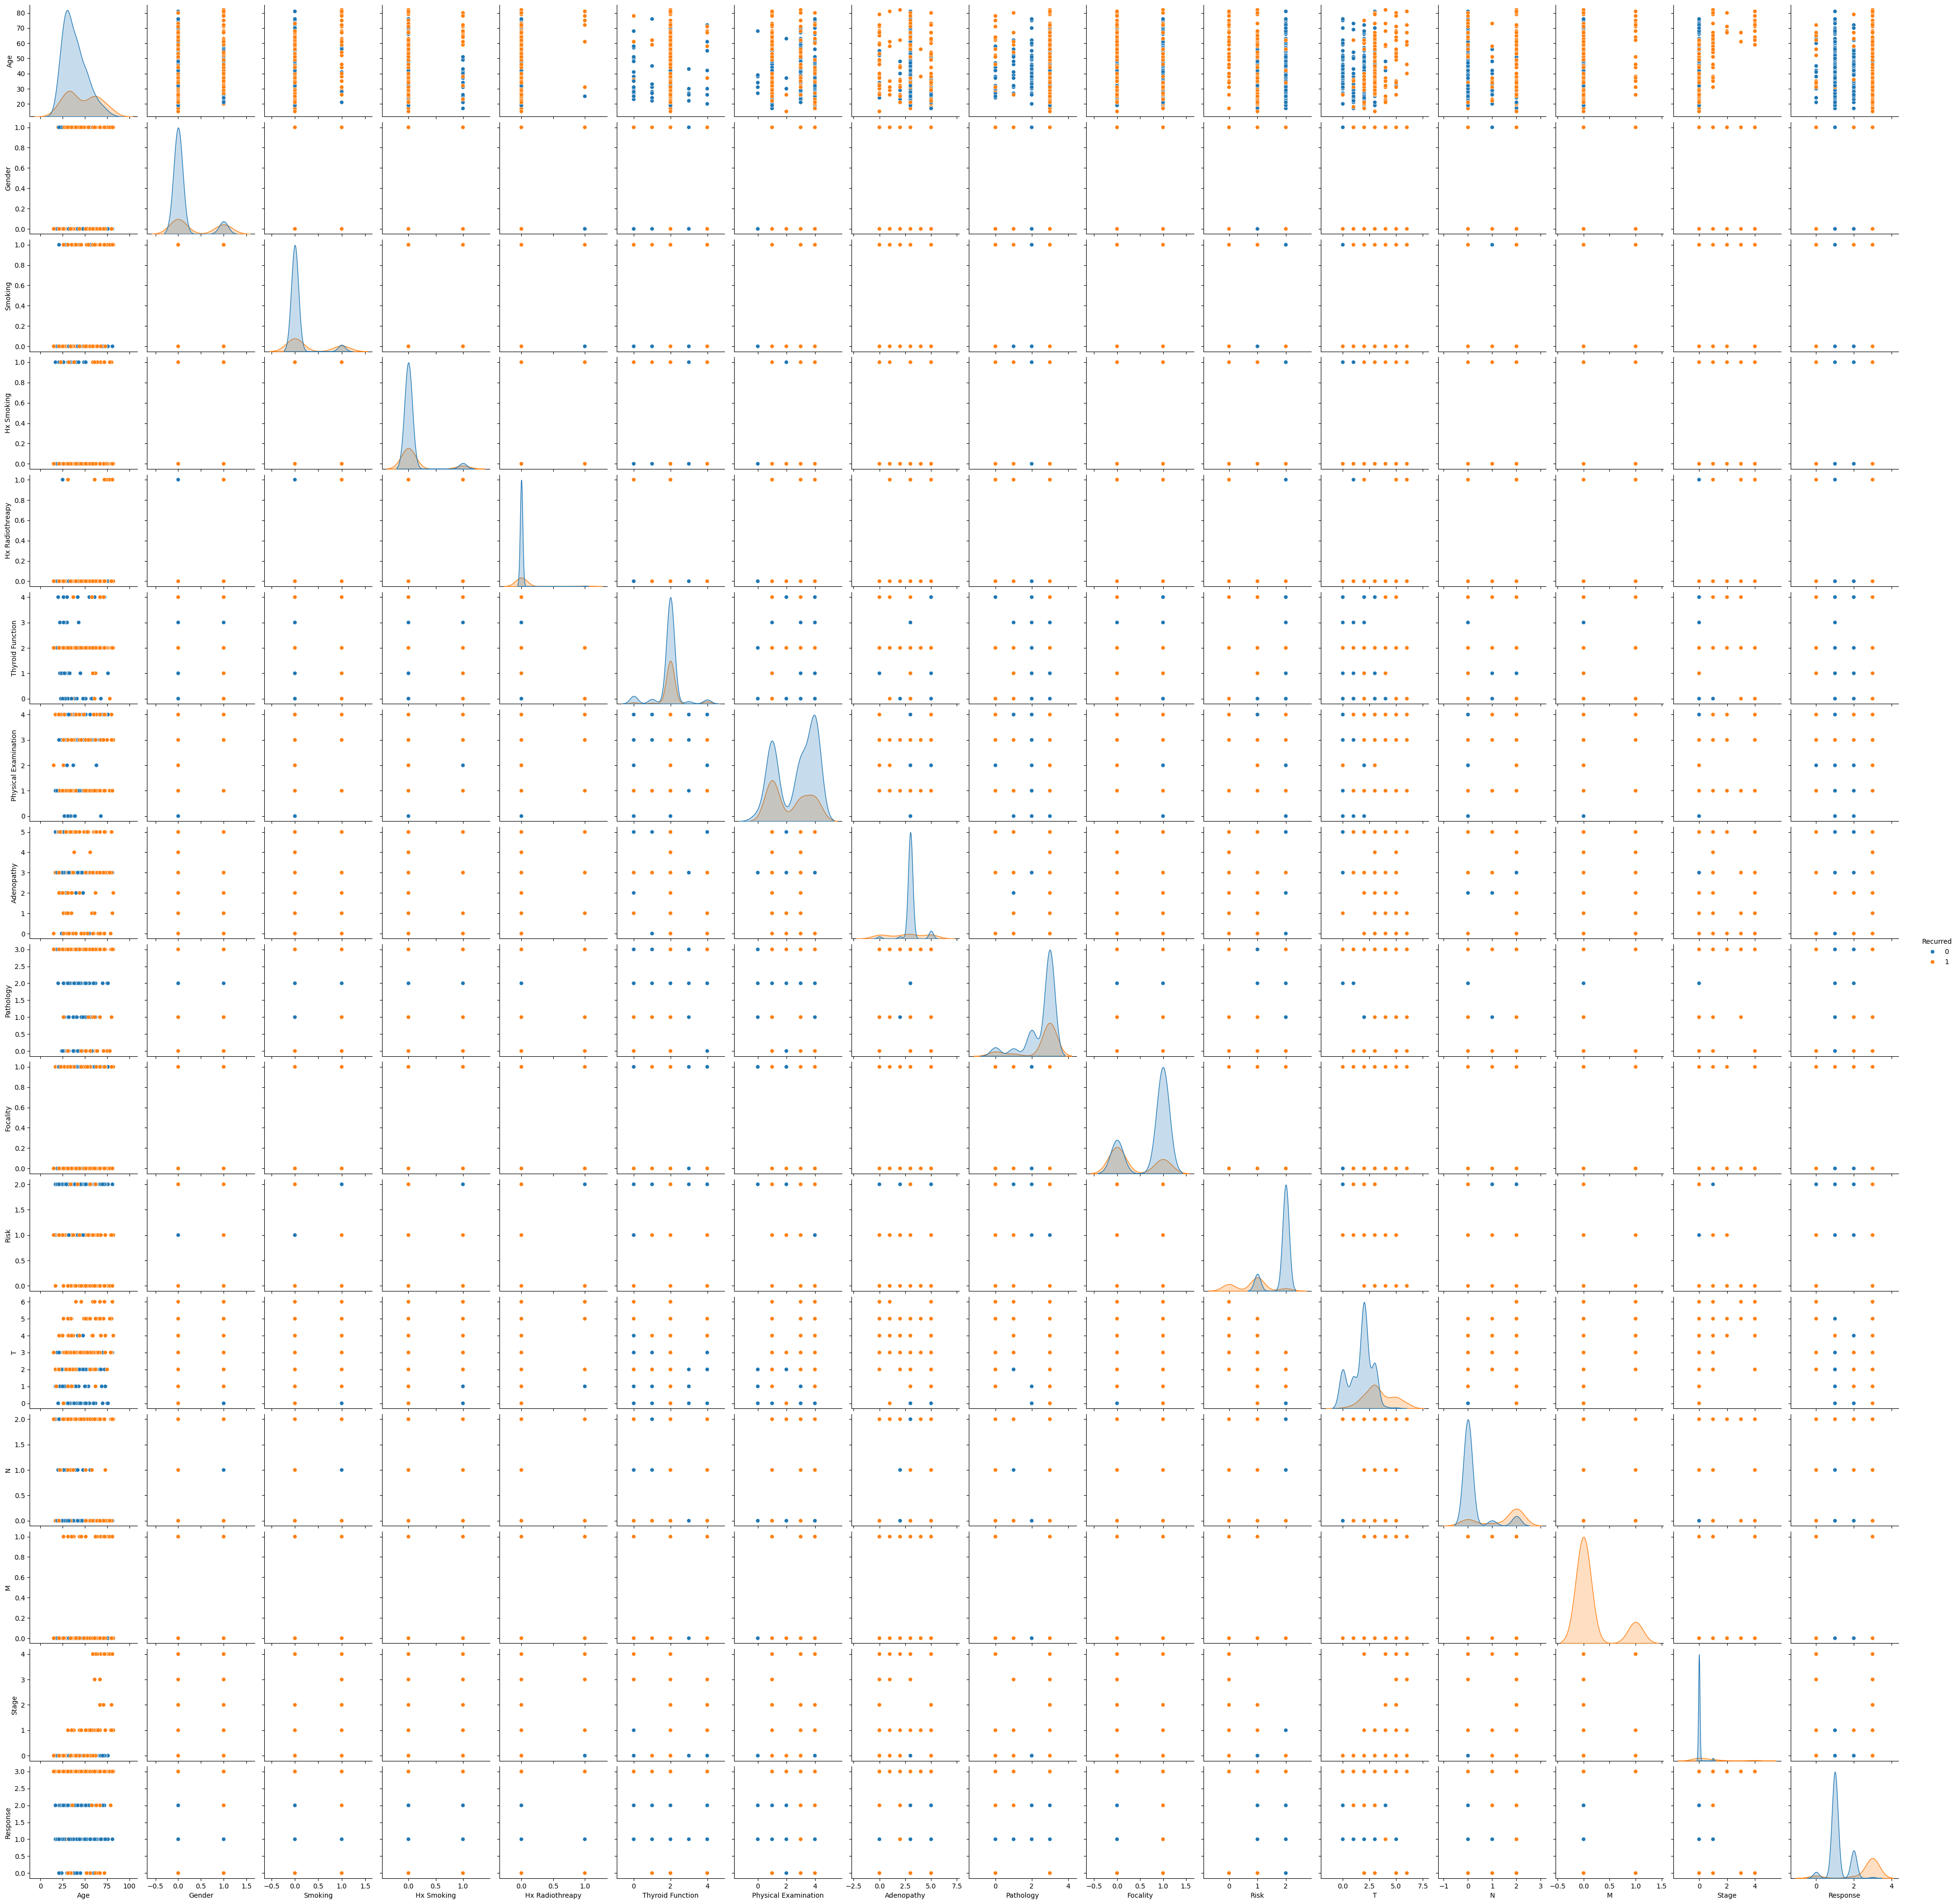

In [8]:
# Plot a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Plot pair plots to visualize relationships between features
sns.pairplot(df, hue='Recurred', diag_kind='kde')
plt.show()

# Common Steps in a Pipeline
## Data Preprocessing:

### Imputation: Handling missing values.
### SimpleImputer: Replaces missing values with mean, median, mode, or a constant value.
### KNNImputer: Replaces missing values using k-nearest neighbors.

## Scaling: Standardizing or normalizing features.
### StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
### MinMaxScaler: Scales features to a given range, typically [0, 1].

## Encoding: Handling categorical variables.
### OneHotEncoder: Converts categorical values into one-hot encoded vectors.
### LabelEncoder: Converts categorical values into integers (though this is usually done outside of pipelines).

# Feature Selection:

### Variance Threshold: Removes features with low variance.
### SelectKBest: Selects the top k features based on a given score function.
### PCA: Principal Component Analysis for dimensionality reduction.

# Model Training:
### Various classifiers and regressors from scikit-learn.

# Custom Transformers:
### You can also create custom transformers by subclassing BaseEstimator and TransformerMixin.

In [9]:
# Define pipelines
pipeline_log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

pipeline_ada = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', AdaBoostClassifier())
])

pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GradientBoostingClassifier())
])

In [10]:
# Define hyperparameters for GridSearchCV
log_reg_params = {'classifier__C': [0.01, 0.1, 1, 10, 100]}
dt_params = {'classifier__max_depth': [None, 10, 20, 30, 40, 50]}
rf_params = {'classifier__n_estimators': [10, 50, 100, 200], 'classifier__max_depth': [None, 10, 20, 30]}
ada_params = {'classifier__n_estimators': [10, 50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1, 10]}
gb_params = {'classifier__n_estimators': [10, 50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1, 10], 'classifier__max_depth': [3, 5, 7]}

In [ ]:
dt_params = {
    'classifier__max_depth': [None, 10, 20, 30, 40, 50],
    'classifier__criterion': ['gini', 'entropy']
}

# Hyperparameter C
## C is a hyperparameter for regularization in logistic regression.
## Regularization: A technique used to prevent overfitting by adding a penalty to the model for having too many large coefficients.
## C: The inverse of the regularization strength. It controls the amount of regularization applied to the model.
## Smaller values of C imply stronger regularization.
## Larger values of C imply weaker regularization.

# In Boosting Algorithms
## The learning_rate hyperparameter is commonly used in ensemble methods, particularly in boosting algorithms such as AdaBoost and Gradient Boosting. It controls the contribution of each new model added to the ensemble.
## Boosting algorithms work by sequentially adding models to the ensemble, each one correcting the errors of the previous models. The learning_rate hyperparameter scales the contribution of each new model added to the ensemble.

In [11]:
# Perform GridSearchCV for each model
models = {
    'Logistic Regression': (pipeline_log_reg, log_reg_params),
    'Decision Tree': (pipeline_dt, dt_params),
    'Random Forest': (pipeline_rf, rf_params),
    'AdaBoost': (pipeline_ada, ada_params),
    'Gradient Boosting': (pipeline_gb, gb_params)
}

for model_name, (pipeline, params) in models.items():
    grid = GridSearchCV(pipeline, params, cv=5)
    grid.fit(X_train, y_train)
    print(f"{model_name} Best Parameters:", grid.best_params_)
    y_pred = grid.predict(X_test)
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Best Parameters: {'classifier__C': 0.1}
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        58
           1       0.94      0.79      0.86        19

    accuracy                           0.94        77
   macro avg       0.94      0.89      0.91        77
weighted avg       0.94      0.94      0.93        77

Decision Tree Best Parameters: {'classifier__max_depth': None}
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.96        58
           1       0.82      0.95      0.88        19

    accuracy                           0.94        77
   macro avg       0.90      0.94      0.92        77
weighted avg       0.94      0.94      0.94        77

Random Forest Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 50}
Random Forest Classification Report:
         

C:\Users\eklav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\eklav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\eklav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\eklav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

AdaBoost Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.84      0.91        19

    accuracy                           0.96        77
   macro avg       0.98      0.92      0.94        77
weighted avg       0.96      0.96      0.96        77

Gradient Boosting Best Parameters: {'classifier__learning_rate': 1, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Sample DataFrame
data = {'age': [25, 30, 35, np.nan, 40],
        'income': [50000, 60000, np.nan, 80000, 90000],
        'gender': ['male', 'female', 'female', 'male', 'male'],
        'recurred': [0, 1, 0, 1, 0]}

df = pd.DataFrame(data)

# Features and target
X = df.drop('recurred', axis=1)
y = df['recurred']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Column names
numeric_features = ['age', 'income']
categorical_features = ['gender']

# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Final pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Define hyperparameters to tune
params = {
    'classifier__n_estimators': [10, 50, 100],
    'classifier__max_depth': [None, 10, 20, 30]
}

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and classification report
print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer

# Example DataFrame setup
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define which features to encode with LabelEncoder
columns_to_encode = ['category_column1', 'category_column2']

# Specify ColumnTransformer to apply LabelEncoder selectively
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', LabelEncoder(), columns_to_encode)  # Apply LabelEncoder to specified columns
    ],
    remainder='passthrough'  # Pass through any other columns as-is
)

# Define pipeline with preprocessing and model
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Scaling numerical features
    ('classifier', RandomForestClassifier())  # Classifier
])

# Define parameters for GridSearchCV
rf_params = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30]
}

# Setup GridSearchCV
grid_search = GridSearchCV(pipeline_rf, param_grid=rf_params, cv=5)
grid_search.fit(X_train, y_train)

# Print best parameters and evaluate performance
print("Best Parameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


### Define Models: First, you define the machine learning models you want to evaluate. This includes setting up pipelines that encapsulate both the preprocessing steps (like scaling or encoding) and the classifier itself.

### Define Hyperparameters: After defining the models, you specify the hyperparameters that you want to tune for each model. Hyperparameters are parameters that are not directly learned from the data but affect the learning process (e.g., regularization strength, tree depth, number of estimators).

### GridSearchCV Setup: Once you have defined your models and specified the hyperparameters to tune, you set up GridSearchCV instances for each model. GridSearchCV is used to systematically search through a grid of hyperparameters and find the best combination that maximizes the performance metric (like accuracy or F1-score) through cross-validation.

### Fit and Evaluate: Finally, you fit each GridSearchCV instance on your training data. This process trains each model with different hyperparameter combinations and evaluates their performance using cross-validation. After training, you can access the best parameters found by GridSearchCV and evaluate the model's performance on unseen test data.